# CSCE 421: Homework 3
### Jeffrey Xu

### 10/05/2020

### Professor Mortazavi

## Problem 1: Implementing Sigmoidal Least Square Cost

For problems associated with the book, please refer to the book's GitHub page for datasets and code pre-ambles:

https://github.com/jermwatt/machine_learning_refined/

**(1)** Repeat the experiment described in Example 6.3 by coding up the Least Squares cost function shown in Equation (6.9) and the normalized gradient descent algorithm detailed in Section A.3. You need not reproduce the contour plot shown in the right panel of Figure 6.5; however, you can verify that your implementation is working properly by reducing the final fit shown in the left panel of that figure. Alternatively show that your final result produces zero misclassifications (see Section 6.8.3). 

The cost function equation is shown below. 

$$g({\bf w})=\dfrac{1}{P}\sum_{p=1}^{P}(\sigma({\bf \dot{x}^{T}w})-y_{p})^{2}$$

We first have to import the proper libraries and dataset. 

In [3]:
# Import autograd-wrapped numpy
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score
from autograd.misc.flatten import flatten_func
from autograd import grad

from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import superlearn_library as superlearn
import warnings

from matplotlib import rcParams
rcParams['figure.autolayout'] = True

warnings.filterwarnings('ignore')

In [4]:
# Load in data 
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname, delimiter = ',')

# Get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(1, 11)
(1, 11)


In [5]:
print(x)

[[-0.12945952  0.17126776  0.18900687  0.62817746  0.98698383  1.1
   1.4         4.          4.3         4.5         4.7       ]]


In [6]:
print(y)

[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]]


Now we define some helper functions to make gradient descent easier. We first define the functions representing our sigmoidal model (linear and sigmoid). Then we define functions for the loss function (loss) and the gradient of the loss function (loss_partial). Finally, we create a function that computes the L2 norm of a vector so that we can properly scale the gradient for normalized gradient descent. 

In [7]:
# Computes the value w0 + w1x
def linear(x, w):
    return np.full(x.shape, w[0][0]) + w[0][1]*x

# Computes the sigmoid function given x, w0, w1
def sigmoid(x, w):
    return 1/(1 + np.exp(-linear(x, w)))

# Computes the loss
def loss(w, x, y):
    return np.mean(np.square(sigmoid(x, w) - y))

def loss_partial(w, x, y):
    loss_grad = grad(loss)
    return loss_grad(w, x, y)

# Computes the magnitude of the gradient
def mag_gradient(w):
    return np.sqrt(np.sum(np.square(w)))

Now we perform gradient descent. First we set up the hyperparameters for the learning rate, the error and the maximal number of iterations. 

Next we initialize $w_{0}=20$ and $w_{1}=-20.$ Then we perform gradient descent. At each iteration we output the current loss value and weights. We then update the weights by the normalized gradient multiplied by the learning rate. We break the loop when the max number of iterations have been ran or the loss value is below some limit. 

In [8]:
# Set up hyperparameters
alpha = 0.05
epsilon = 0.025
max_iter = int(1e8)

# Initial Weights
w0 = 20
w1 = -20

# Arrays holding information about the descent
w = np.array([[float(w0), float(w1)]])
weights = []
l = []

# Gradient Descent iterations
for i in range(max_iter):
    # Append weights and loss values
    weights.append(w)
    l.append(loss(w, x, y))
    print('Iteration:', i, 'Loss:', loss(w, x, y), 'w0:', w[0][0], 'w1:', w[0][1])
    
    # Compute gradient and update
    loss_gradient = loss_partial(w, x, y)
    mag_g = mag_gradient(loss_gradient)
    w = w - alpha * loss_gradient / mag_g
    
    # Break case
    if loss(w, x, y) < epsilon:
        break

Iteration: 0 Loss: 0.9175326200694246 w0: 20.0 w1: -20.0
Iteration: 1 Loss: 0.9169924203733708 w0: 19.960098767700064 w1: -20.030131240614125
Iteration: 2 Loss: 0.9164372547390016 w0: 19.92050428159842 w1: -20.060664446642097
Iteration: 3 Loss: 0.9158730046909827 w0: 19.88116043835117 w1: -20.09151994855887
Iteration: 4 Loss: 0.9153053469436349 w0: 19.84202134962552 w1: -20.12263476390021
Iteration: 5 Loss: 0.9147396558252369 w0: 19.80304874098357 w1: -20.153957850843252
Iteration: 6 Loss: 0.9141809216543305 w0: 19.764210047296494 w1: -20.185446831021743
Iteration: 7 Loss: 0.9136336851386869 w0: 19.725476987194725 w1: -20.21706565540142
Iteration: 8 Loss: 0.9131019877704024 w0: 19.686824469333263 w1: -20.248782888303573
Iteration: 9 Loss: 0.9125893379277389 w0: 19.64822972924961 w1: -20.280570402171055
Iteration: 10 Loss: 0.9120986920609192 w0: 19.609671625698983 w1: -20.312402346041623
Iteration: 11 Loss: 0.911632449995002 w0: 19.571130045108852 w1: -20.344254293636933
Iteration: 12 L

Iteration: 111 Loss: 0.8651195836600898 w0: 15.242298306790552 w1: -22.771322278586087
Iteration: 112 Loss: 0.8635534172192937 w0: 15.199953834822756 w1: -22.79791072896907
Iteration: 113 Loss: 0.8619760852637736 w0: 15.157609552635211 w1: -22.82449948159159
Iteration: 114 Loss: 0.8603909940504502 w0: 15.115265427462662 w1: -22.851088484268853
Iteration: 115 Loss: 0.8588016808769491 w0: 15.072921428558963 w1: -22.877677688033607
Iteration: 116 Loss: 0.8572117880804327 w0: 15.030577526797602 w1: -22.904267046499434
Iteration: 117 Loss: 0.8556250345016967 w0: 14.988233694295003 w1: -22.930856515260427
Iteration: 118 Loss: 0.8540451847918458 w0: 14.945889904050594 w1: -22.957446051317632
Iteration: 119 Loss: 0.8524760170124718 w0: 14.903546129597796 w1: -22.984035612522938
Iteration: 120 Loss: 0.8509212890451885 w0: 14.86120234466017 w1: -23.010625157031185
Iteration: 121 Loss: 0.8493847043796253 w0: 14.81885852280692 w1: -23.0372146427513
Iteration: 122 Loss: 0.8478698778877846 w0: 14.77

Iteration: 226 Loss: 0.816744161198961 w0: 10.078587262506664 w1: -25.133744217558597
Iteration: 227 Loss: 0.8166695462238995 w0: 10.02940063000334 w1: -25.142726154041494
Iteration: 228 Loss: 0.8165911093565582 w0: 9.980213209810557 w1: -25.151703775930322
Iteration: 229 Loss: 0.8165086552295029 w0: 9.931025117112435 w1: -25.160677712453438
Iteration: 230 Loss: 0.8164219790432111 w0: 9.881836450003943 w1: -25.16964849993782
Iteration: 231 Loss: 0.8163308661178185 w0: 9.832647292003639 w1: -25.17861659534438
Iteration: 232 Loss: 0.8162350914295835 w0: 9.783457714196025 w1: -25.18758238784191
Iteration: 233 Loss: 0.8161344191317267 w0: 9.734267777058076 w1: -25.19654620869937
Iteration: 234 Loss: 0.8160286020593582 w0: 9.685077532016413 w1: -25.205508339737314
Iteration: 235 Loss: 0.8159173812182794 w0: 9.635887022774785 w1: -25.214469020545675
Iteration: 236 Loss: 0.8158004852575268 w0: 9.586696286445639 w1: -25.22342845464591
Iteration: 237 Loss: 0.8156776299256041 w0: 9.5375053545146

Iteration: 347 Loss: 0.6599453697268397 w0: 4.125339283889897 w1: -26.21137162394118
Iteration: 348 Loss: 0.6584651542636126 w0: 4.076106492501061 w1: -26.22009700370732
Iteration: 349 Loss: 0.6570526922035124 w0: 4.026872276615216 w1: -26.228814341953946
Iteration: 350 Loss: 0.6557070955613971 w0: 3.977636547814213 w1: -26.237523131159918
Iteration: 351 Loss: 0.6544272674778664 w0: 3.9283992053964627 w1: -26.24622279274168
Iteration: 352 Loss: 0.6532119204269352 w0: 3.879160134613285 w1: -26.25491266664233
Iteration: 353 Loss: 0.6520595950230622 w0: 3.829919204674845 w1: -26.26359199949674
Iteration: 354 Loss: 0.6509686791641373 w0: 3.7806762664969904 w1: -26.272259931176905
Iteration: 355 Loss: 0.6499374272600625 w0: 3.731431150157426 w1: -26.280915479495917
Iteration: 356 Loss: 0.6489639793133496 w0: 3.682183662026832 w1: -26.289557522820672
Iteration: 357 Loss: 0.6480463796380259 w0: 3.6329335815378756 w1: -26.29818478031256
Iteration: 358 Loss: 0.6471825950253883 w0: 3.58368065755

Iteration: 466 Loss: 0.6086177386049347 w0: -1.7753347103556103 w1: -26.15694799521112
Iteration: 467 Loss: 0.6075442182766859 w0: -1.8249209958068011 w1: -26.15052924960524
Iteration: 468 Loss: 0.6064444521337152 w0: -1.8745072714922066 w1: -26.14411042855687
Iteration: 469 Loss: 0.6053190499527743 w0: -1.924093538600417 w1: -26.137691541248838
Iteration: 470 Loss: 0.604168735219201 w0: -1.9736797981700154 w1: -26.13127259570487
Iteration: 471 Loss: 0.602994348296309 w0: -2.0232660511089646 w1: -26.124853598939445
Iteration: 472 Loss: 0.6017968488756923 w0: -2.072852298211448 w1: -26.118434557087934
Iteration: 473 Loss: 0.6005773176161686 w0: -2.1224385401725034 w1: -26.112015475519698
Iteration: 474 Loss: 0.5993369568820118 w0: -2.1720247776007424 w1: -26.10559635893637
Iteration: 475 Loss: 0.5980770904961088 w0: -2.221611011029408 w1: -26.09917721145731
Iteration: 476 Loss: 0.5967991624308889 w0: -2.2711972409259893 w1: -26.092758036693887
Iteration: 477 Loss: 0.5955047343693838 w0:

Iteration: 604 Loss: 0.5454565892543403 w0: -8.618231196355481 w1: -25.27107685241258
Iteration: 605 Loss: 0.5454563940802916 w0: -8.667817397045681 w1: -25.26465745204251
Iteration: 606 Loss: 0.545456217506354 w0: -8.717403597738114 w1: -25.25823805168969
Iteration: 607 Loss: 0.5454560577652718 w0: -8.76698979843281 w1: -25.251818651354363
Iteration: 608 Loss: 0.5454559132569561 w0: -8.816575999129801 w1: -25.24539925103675
Iteration: 609 Loss: 0.5454557825327762 w0: -8.866162199829116 w1: -25.238979850737085
Iteration: 610 Loss: 0.5454556642813126 w0: -8.91574840053078 w1: -25.232560450455583
Iteration: 611 Loss: 0.545455557315439 w0: -8.965334601234826 w1: -25.226141050192457
Iteration: 612 Loss: 0.5454554605606075 w0: -9.014920801941276 w1: -25.21972164994791
Iteration: 613 Loss: 0.54545537304423 w0: -9.064507002650158 w1: -25.213302249722148
Iteration: 614 Loss: 0.5454552938860535 w0: -9.114093203361497 w1: -25.20688284951536
Iteration: 615 Loss: 0.5454552222894355 w0: -9.16367940

Iteration: 704 Loss: 0.5454545455407148 w0: -13.576851279485236 w1: -24.629136924395734
Iteration: 705 Loss: 0.5454545455324499 w0: -13.626437480476014 w1: -24.62271752634745
Iteration: 706 Loss: 0.5454545455249776 w0: -13.67602368146969 w1: -24.616298128321574
Iteration: 707 Loss: 0.5454545455182221 w0: -13.72560988246622 w1: -24.609878730317728
Iteration: 708 Loss: 0.5454545455121147 w0: -13.775196083465548 w1: -24.603459332335508
Iteration: 709 Loss: 0.5454545455065929 w0: -13.824782284467622 w1: -24.59703993437448
Iteration: 710 Loss: 0.5454545455016008 w0: -13.874368485472377 w1: -24.590620536434173
Iteration: 711 Loss: 0.5454545454970874 w0: -13.923954686479751 w1: -24.58420113851409
Iteration: 712 Loss: 0.545454545493007 w0: -13.973540887489673 w1: -24.577781740613688
Iteration: 713 Loss: 0.5454545454893179 w0: -14.023127088502067 w1: -24.571362342732385
Iteration: 714 Loss: 0.5454545454859828 w0: -14.072713289516853 w1: -24.564942944869564
Iteration: 715 Loss: 0.545454545482967

Iteration: 828 Loss: 0.5454545454545457 w0: -19.72553983044441 w1: -23.83312869373572
Iteration: 829 Loss: 0.5454545454545457 w0: -19.77512600745555 w1: -23.826709110461078
Iteration: 830 Loss: 0.5454545454545457 w0: -19.824712182994126 w1: -23.82028951581207
Iteration: 831 Loss: 0.5454545454545457 w0: -19.87429835697135 w1: -23.813869909102905
Iteration: 832 Loss: 0.5454545454545456 w0: -19.923884529293105 w1: -23.807450289606603
Iteration: 833 Loss: 0.5454545454545456 w0: -19.97347069985961 w1: -23.801030656552513
Iteration: 834 Loss: 0.5454545454545456 w0: -20.023056868565106 w1: -23.794611009123702
Iteration: 835 Loss: 0.5454545454545456 w0: -20.072643035297467 w1: -23.788191346454173
Iteration: 836 Loss: 0.5454545454545456 w0: -20.122229199937838 w1: -23.78177166762591
Iteration: 837 Loss: 0.5454545454545456 w0: -20.171815362360224 w1: -23.77535197166577
Iteration: 838 Loss: 0.5454545454545456 w0: -20.221401522431066 w1: -23.768932257542158
Iteration: 839 Loss: 0.5454545454545456 

Iteration: 940 Loss: 0.5454545454545454 w0: -25.278911446351792 w1: -23.111981876195678
Iteration: 941 Loss: 0.5454545454545454 w0: -25.328480501620035 w1: -23.105431398364725
Iteration: 942 Loss: 0.5454545454545454 w0: -25.378048511251155 w1: -23.098873012800485
Iteration: 943 Loss: 0.5454545454545454 w0: -25.427615410459346 w1: -23.09230624016204
Iteration: 944 Loss: 0.5454545454545454 w0: -25.477181130318186 w1: -23.08573057176447
Iteration: 945 Loss: 0.5454545454545454 w0: -25.526745597480414 w1: -23.079145467746727
Iteration: 946 Loss: 0.5454545454545454 w0: -25.576308733876832 w1: -23.07255035512069
Iteration: 947 Loss: 0.5454545454545454 w0: -25.625870456392597 w1: -23.065944625693113
Iteration: 948 Loss: 0.5454545454545454 w0: -25.67543067651893 w1: -23.059327633851666
Iteration: 949 Loss: 0.5454545454545454 w0: -25.72498929997808 w1: -23.052698694205393
Iteration: 950 Loss: 0.5454545454545454 w0: -25.774546226319252 w1: -23.046057079069314
Iteration: 951 Loss: 0.54545454545454

Iteration: 1071 Loss: 0.5454545454545454 w0: -28.768674438786533 w1: -20.060126959183897
Iteration: 1072 Loss: 0.5454545454545454 w0: -28.740275777227154 w1: -20.018974607833872
Iteration: 1073 Loss: 0.5454545454545454 w0: -28.71171652904301 w1: -19.977933538852223
Iteration: 1074 Loss: 0.5454545454545454 w0: -28.683003832377103 w1: -19.936999676950716
Iteration: 1075 Loss: 0.5454545454545454 w0: -28.654144381448365 w1: -19.89616914802821
Iteration: 1076 Loss: 0.5454545454545454 w0: -28.62514446229687 w1: -19.85543826675605
Iteration: 1077 Loss: 0.5454545454545454 w0: -28.596009985037043 w1: -19.81480352503426
Iteration: 1078 Loss: 0.5454545454545454 w0: -28.566746513015424 w1: -19.774261581256983
Iteration: 1079 Loss: 0.5454545454545454 w0: -28.537359289218834 w1: -19.733809250328726
Iteration: 1080 Loss: 0.5454545454545454 w0: -28.50785326023498 w1: -19.693443494376385
Iteration: 1081 Loss: 0.5454545454545454 w0: -28.47823309803009 w1: -19.653161414105426
Iteration: 1082 Loss: 0.5454

Iteration: 1166 Loss: 0.5454545454545454 w0: -25.766258005238527 w1: -16.382357211736082
Iteration: 1167 Loss: 0.5454545454545454 w0: -25.733287670422627 w1: -16.344767891149946
Iteration: 1168 Loss: 0.5454545454545454 w0: -25.700306240142073 w1: -16.30718830551294
Iteration: 1169 Loss: 0.5454545454545454 w0: -25.66731394833706 w1: -16.26961825518754
Iteration: 1170 Loss: 0.5454545454545454 w0: -25.634311023727395 w1: -16.232057544768157
Iteration: 1171 Loss: 0.5454545454545454 w0: -25.601297689959488 w1: -16.19450598296936
Iteration: 1172 Loss: 0.5454545454545454 w0: -25.568274165748328 w1: -16.156963382517674
Iteration: 1173 Loss: 0.5454545454545454 w0: -25.535240665014705 w1: -16.11942956004671
Iteration: 1174 Loss: 0.5454545454545454 w0: -25.502197397017802 w1: -16.081904335995617
Iteration: 1175 Loss: 0.5454545454545454 w0: -25.469144566483415 w1: -16.044387534510616
Iteration: 1176 Loss: 0.5454545454545454 w0: -25.436082373727913 w1: -16.006878983349605
Iteration: 1177 Loss: 0.54

Iteration: 1282 Loss: 0.5454545454545454 w0: -21.90416053605513 w1: -12.055256184815587
Iteration: 1283 Loss: 0.5454545454545454 w0: -21.87073856960666 w1: -12.01806785117831
Iteration: 1284 Loss: 0.5454545454545453 w0: -21.837316641971483 w1: -11.98087948265872
Iteration: 1285 Loss: 0.5454545454545453 w0: -21.803894792102973 w1: -11.943691044248824
Iteration: 1286 Loss: 0.5454545454545453 w0: -21.770473058689646 w1: -11.906502501179105
Iteration: 1287 Loss: 0.5454545454545453 w0: -21.737051480164038 w1: -11.86931381891075
Iteration: 1288 Loss: 0.5454545454545453 w0: -21.70363009471145 w1: -11.83212496312801
Iteration: 1289 Loss: 0.5454545454545453 w0: -21.670208940278545 w1: -11.794935899730662
Iteration: 1290 Loss: 0.5454545454545453 w0: -21.636788054581814 w1: -11.757746594826617
Iteration: 1291 Loss: 0.5454545454545453 w0: -21.603367475115906 w1: -11.720557014724617
Iteration: 1292 Loss: 0.5454545454545453 w0: -21.56994723916184 w1: -11.683367125927061
Iteration: 1293 Loss: 0.54545

Iteration: 1400 Loss: 0.5454545454538564 w0: -17.970207009589476 w1: -7.658226345620793
Iteration: 1401 Loss: 0.5454545454538025 w0: -17.937038272326816 w1: -7.620811978481943
Iteration: 1402 Loss: 0.5454545454537443 w0: -17.90387397871191 w1: -7.5833936724135995
Iteration: 1403 Loss: 0.5454545454536817 w0: -17.870714174109544 w1: -7.545971388160326
Iteration: 1404 Loss: 0.545454545453614 w0: -17.837558904118726 w1: -7.508545086288033
Iteration: 1405 Loss: 0.545454545453541 w0: -17.80440821457347 w1: -7.471114727183769
Iteration: 1406 Loss: 0.5454545454534624 w0: -17.771262151543514 w1: -7.43368027105557
Iteration: 1407 Loss: 0.5454545454533775 w0: -17.73812076133495 w1: -7.396241677932381
Iteration: 1408 Loss: 0.545454545453286 w0: -17.704984090490818 w1: -7.358798907664043
Iteration: 1409 Loss: 0.5454545454531872 w0: -17.671852185791604 w1: -7.321351919921339
Iteration: 1410 Loss: 0.5454545454530808 w0: -17.638725094255683 w1: -7.283900674196119
Iteration: 1411 Loss: 0.54545454545296

Iteration: 1520 Loss: 0.5454545389552569 w0: -14.03625454963013 w1: -3.128076518628815
Iteration: 1521 Loss: 0.5454545384312876 w0: -14.00400573529519 w1: -3.0898663894221428
Iteration: 1522 Loss: 0.545454537864858 w0: -13.971768794044172 w1: -3.051646242656615
Iteration: 1523 Loss: 0.545454537252506 w0: -13.939543878569161 w1: -3.0134159559374645
Iteration: 1524 Loss: 0.5454545365904858 w0: -13.907331153405035 w1: -2.975175397135317
Iteration: 1525 Loss: 0.5454545358747431 w0: -13.875130796425951 w1: -2.9369244231553058
Iteration: 1526 Loss: 0.5454545351008899 w0: -13.842943000529104 w1: -2.8986628785536714
Iteration: 1527 Loss: 0.5454545342641764 w0: -13.81076797552914 w1: -2.860390593983088
Iteration: 1528 Loss: 0.5454545333594616 w0: -13.77860595028954 w1: -2.82210738444565
Iteration: 1529 Loss: 0.545454532381179 w0: -13.746457175120538 w1: -2.7838130473299225
Iteration: 1530 Loss: 0.5454545313233022 w0: -13.714321924476872 w1: -2.7455073602055697
Iteration: 1531 Loss: 0.5454545301

Iteration: 1630 Loss: 0.5362570385345083 w0: -11.450520815862133 w1: 1.603919493657284
Iteration: 1631 Loss: 0.5339589649063519 w0: -11.439581384351719 w1: 1.6527081074747412
Iteration: 1632 Loss: 0.53110550884707 w0: -11.428649251552832 w1: 1.7014983572431885
Iteration: 1633 Loss: 0.5275741286955977 w0: -11.41772328172663 w1: 1.7502899875024547
Iteration: 1634 Loss: 0.5232218972182355 w0: -11.40680225608011 w1: 1.7990827246549048
Iteration: 1635 Loss: 0.5178858326763037 w0: -11.39588482617497 w1: 1.8478762664843966
Iteration: 1636 Loss: 0.5113856354119114 w0: -11.384969461464562 w1: 1.8966702703500233
Iteration: 1637 Loss: 0.5035300105559004 w0: -11.374054390251423 w1: 1.9454643398709404
Iteration: 1638 Loss: 0.49412784700623286 w0: -11.363137533967222 w1: 1.9942580100431062
Iteration: 1639 Loss: 0.4830052790129372 w0: -11.352216435737802 w1: 2.0430507309496444
Iteration: 1640 Loss: 0.4700288411597921 w0: -11.341288185887818 w1: 2.0918418505844336
Iteration: 1641 Loss: 0.4551333524815

Iteration: 1744 Loss: 0.07936428932415504 w0: -8.781526330547338 w1: 6.521465886207304
Iteration: 1745 Loss: 0.07635237522982674 w0: -8.750260044261315 w1: 6.560484078654936
Iteration: 1746 Loss: 0.07339953571191087 w0: -8.718890707830841 w1: 6.599419470420163
Iteration: 1747 Loss: 0.0705091914389098 w0: -8.68741765286747 w1: 6.638271070274901
Iteration: 1748 Loss: 0.06768428613636003 w0: -8.65584139046532 w1: 6.677038835914805
Iteration: 1749 Loss: 0.06492743426447305 w0: -8.624163708249561 w1: 6.7157237741910585
Iteration: 1750 Loss: 0.062241075091268076 w0: -8.59238773915162 w1: 6.754328019914641
Iteration: 1751 Loss: 0.05962762456558703 w0: -8.56051800141673 w1: 6.792854891273593
Iteration: 1752 Loss: 0.05708961691046717 w0: -8.528560413296866 w1: 6.831308923072106
Iteration: 1753 Loss: 0.054629828792305705 w0: -8.496522290158548 w1: 6.869695882651812
Iteration: 1754 Loss: 0.052251380174773134 w0: -8.464412336031886 w1: 6.908022777203597
Iteration: 1755 Loss: 0.049957807429075275 w

Now we determine how well our model performed. We must first translate our sigmoidal values to binary values. We notice that we have a perfect f1 score meaning that our model produces zero misclassifications. 

w0: 9.465515995131483 w1: 9.465515995131483
F1 Score: 1.0


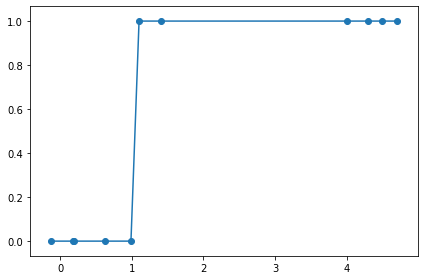

In [9]:
# Final values of weights
print('w0:', w[0][1],'w1:', w[0][1])

# Compute predicted values and assign to categories
pred = sigmoid(x, w)
for i in range(len(pred[0])):
    if pred[0][i] < 0.5:
        pred[0][i] = 0
    elif pred[0][i] >= 0.5:
        pred[0][i] = 1
        
# Output F1 Score
print('F1 Score:', f1_score(pred[0], y[0]))

# Plot the model
plt.plot(x[0], y[0])
plt.scatter(x[0], pred[0])
plt.show()

## Problem 2: Multi-class Perceptrons

Finish the argument started in Section 7.3.3 to show that the multi-class Perceptron cost in Equation (7.16) reduces to the two-class Perceptron cost in Equation (6.33). 

We need to show that the following

$$g({\bf w_{0},...,w_{C-1}})=\dfrac{1}{P}\sum_{p=1}^{P}[(\max_{j=0,...,C-1}\dot{{\bf x}}_{p}{\bf w_{j}})-\dot{{\bf x}}_{p}^{T}{\bf w}_{y_{p}}]$$

reduces down to 

$$g({\bf w})=\dfrac{1}{P}\sum_{p=1}^{P}max(0,-y\dot{{\bf x}}_{p}^{T}{\bf w})$$

When we set $C=2$, we notice that the equation for the multi-class perceptron reduces down to the following.

$$g(w_{0}^{(0)}, {\bf w}^{(0)}, w_{0}^{(1)}, {\bf w}^{(1)})=\sum_{p=1}^{P}[\max(w_{0}^{(0)}+{\bf x}_{p}^{T}{\bf w}^{(0)}, w_{0}^{(1)}+{\bf x}_{p}^{T}{\bf w}^{(1)})-(w_{0}^{y_{p}}+{\bf x}_{p}^{T}{\bf w}^{(y_{p})})]$$

We know with the max function that it is distributive through the addition/subtraction operator, therefore, the equation can be further reduced to the following. 

$$g(w_{0}^{(0)}, {\bf w}^{(0)}, w_{0}^{(1)}, {\bf w}^{(1)})=\sum_{p=1}^{P}[\max(w_{0}^{(0)}+{\bf x}_{p}^{T}{\bf w}^{(0)}-(w_{0}^{y_{p}}+{\bf x}_{p}^{T}{\bf w}^{(y_{p})}), w_{0}^{(1)}+{\bf x}_{p}^{T}{\bf w}^{(1)}-(w_{0}^{y_{p}}+{\bf x}_{p}^{T}{\bf w}^{(y_{p})}))]$$

If we group the decision classes together, we get the following. 

$$g(w_{0}^{(0)}, {\bf w}^{(0)}, w_{0}^{(1)}, {\bf w}^{(1)})=\sum_{p:y_{p}=0}\max(0, w_{0}^{(1)}-w_{0}^{(0)}+{\bf x}_{p}^{T}({\bf w}^{(1)}-{\bf w}^{(0)}))+\sum_{p:y_{p}=1}\max(0, w_{0}^{(0)}-w_{0}^{(1)}+{\bf x}_{p}^{T}({\bf w}^{(0)}-{\bf w}^{(1)}))$$

We can re-assign the labels to get the specified labels for SVC by having $y_{p}=0\rightarrow -1$ and $y_{p}=1\rightarrow +1$. We can rewrite the equation as the following.

$$g(w_{0}^{(-1)}, {\bf w}^{(-1)}, w_{0}^{(+1)}, {\bf w}^{(+1)})=\sum_{p:y_{p}=-1}\max(0, w_{0}^{(+1)}-w_{0}^{(-1)}+{\bf x}_{p}^{T}({\bf w}^{(+1)}-{\bf w}^{(-1)}))+\sum_{p:y_{p}=+1}\max(0, w_{0}^{(-1)}-w_{0}^{(+1)}+{\bf x}_{p}^{T}({\bf w}^{(-1)}-{\bf w}^{(+1)}))$$

If we let $w_{0}=w_{0}^{(+1)}-w_{0}^{(-1)}$ and ${\bf w}={\bf w}^{(+1)}-{\bf w}^{-1}$, then the above equation simplifies to the following.

$$g(w_{0}, {\bf w})=\sum_{p:y_{p}=-1}\max(0, w_{0}+{\bf x}_{p}^{T}{\bf w})+\sum_{p:y_{p}=+1}\max(0, -w_{0}-{\bf x}_{p}^{T}{\bf w})$$

Combining the two summations by multiplying each term by $-y_{p}$, we can simplify the equation down to the following.

$$g(w_{0},{\bf w})=\sum_{p=1}^{P}\max(0, -y_{p}(w_{0}+{\bf x}_{p}^{T}{\bf w}))$$

We can take the mean of this function and we see that we get the original equation for 2-class perceptron class. 

## Problem 3: Ridge and Lasso

It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Assume $n$ are the number of training samples, $p$ the number of dimensions, $x$ in the input and $y$ in the output.

Suppose that $n=2$, $p=1$, $x_{11}=x_{12}$ and $x_{21}=x_{22}$. Furthermore, suppose that $y_{1}+y_{2}=0$ and $x_{11}+x_{21}=0$ and $x_{12}+x_{22}=0$, so that the estimate for the intercept in a least squares, ridge regressionm or lasso model is zero: $\hat{\beta}_{0}=0$. 

**(a)** Write out the ridge regression optimization problem in this setting.

The general form for Ridge Regression is shown below.

$$Minimize: \sum_{i=1}^{n}(y_{i}-\hat{\beta}_{0}-\sum_{j=1}^{p}\hat{\beta}_{j}x_{j})^{2}+\lambda\sum_{i=1}^{p}\hat{\beta}_{j}^{2}$$

Formalizing this for our problem, we see that our optimization looks like the following.

$$Minimize: (y_{1}-\hat{\beta}_{1}x_{11}-\hat{\beta}_{2}x_{12})^{2}+(y_{2}-\hat{\beta}_{1}x_{21}-\hat{\beta}_{2}x_{22})^{2}+\lambda(\hat{\beta}_{1}^{2}+\hat{\beta}_{2}^{2})$$

**(b)** Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta}_{1}=\hat{\beta}_{2}$. 

We know from the given values in the problem that $x_{11}=x_{12}=x_{1},x_{21}=x_{22}=x_{2}$. Therefore, if we take the derivatives of the function and solve for $\hat{\beta}_{1}$ and $\hat{\beta}_{2}$, we get the following equations for the optimal values of the coefficients.

$$\hat{\beta}_{1}^{*}=\dfrac{x_{1}y_{1}+x_{2}y_{2}-\hat{\beta}_{2}^{*}(x_{1}^{2}+x_{2}^{2})}{\lambda+x_{1}^{2}+x_{2}^{2}}\\
\hat{\beta}_{2}^{*}=\dfrac{x_{1}y_{1}+x_{2}y_{2}-\hat{\beta}_{1}^{*}(x_{1}^{2}+x_{2}^{2})}{\lambda+x_{1}^{2}+x_{2}^{2}}\\
$$

We notice that an inherent symmetry arises between these two equations making them equivalent. Therefore, we conclude that $\hat{\beta}_{1}=\hat{\beta}_{2}$. 

**(c)** Write out the lasso optimization problem in this setting. 

The Lasso optimization problem is very similar to the Ridge Regression optimization problem. The only difference is that instead of taking the L2 norm of the weights, we take the L1 norm of the weights. Therefore the optimization problem for Lasso will look like the following.

$$Minimize: (y_{1}-\hat{\beta}_{1}x_{11}-\hat{\beta}_{2}x_{12})^{2}+(y_{2}-\hat{\beta}_{1}x_{21}-\hat{\beta}_{2}x_{22})^{2}+\lambda(|\hat{\beta}_{1}|+|\hat{\beta}_{2}|)$$

**(d)** Argue that in this setting, the lasso coefficients $\hat{\beta}_{1}$ and $\hat{\beta}_{2}$ are not unique - in other words, there are many possible solutions to the optimization problem. Describe these solutions. 

We know from Lasso Regression that the constraint takes the form $|\hat{\beta}_{1}|+|\hat{\beta}_{2}|<s$ which will form a diamond shape at the origin. This arises from the fact that we are taking the L1 norm instead of the L2 norm for Lasso Regression. 

Next, we know that $x_{11}=x_{12}, x_{21}=x_{22}$ and $x_{11}+x_{21}=0, x_{12}+x_{22}=0$ and $y_{1}+y_{2}=0$. Therefore, we can use these values to simplify the RSS portion of the loss function. This will give us the following.

$$(y_{1}-\hat{\beta}_{1}x_{11}-\hat{\beta}_{2}x_{12})^{2}+(y_{2}-\hat{\beta}_{1}x_{21}-\hat{\beta}_{2}x_{22})^{2}=2(y_{1}-(\hat{\beta}_{1}+\hat{\beta}_{2})x_{11})^{2}$$

If we set this equation to zero, we notice that this optimization problem has a solution in the form $\hat{\beta}_{1}+\hat{\beta}_{2}=\dfrac{y_{1}}{x_{11}}$. This line is in fact parallel to the edge of the diamond shape created by Lasso Regularization $\hat{\beta}_{1}+\hat{\beta}_{2}=s$. Therefore, the entire edge of $\hat{\beta}_{1}+\hat{\beta}_{2}=s$ could be a potential solution to the Lasso Regularization problem. 

Similarly, the same argument can be made for the negative value $\hat{\beta}_{1}+\hat{\beta}_{2}=-s$. Therefore, the general form of the solution to the Lasso Optimization problem is in the following form.

$$\hat{\beta}_{1}+\hat{\beta}_{2}=s;\hat{\beta}_{1}\geq0;\hat{\beta}_{2}\geq0\\
\hat{\beta}_{1}+\hat{\beta}_{2}=-s;\hat{\beta}_{1}\geq0;\hat{\beta}_{2}\geq0
$$

## Problem 4: Revisiting Problem with Regularization

For this problem, please download the associated *heart_input.csv* file. Heart disease is a major burden on the health care system and a leading cause of death in older adults. It is important to predict, from clinical data gathered on patients, who will have heart disease and who will not. In this problem, we will explore a dataset of such clinical data.

**(1) Prediction:** Using 80% of the data as a training set and 20% as a testing set, please implement ridge regression and a lasso regularization logistic regression model to identify risk of heart disease from the input data. Please describe your hyperparameter and tuning procedures. 

In [10]:
# Import the Ridge and Lasso Regressors
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

Now we have to read in the data file. We use the *Pandas* function *read_csv* to read in the data  and store it into a *Pandas* dataframe. 

In [11]:
# Read in data
data = pd.read_csv("heart_input.csv")

# Configure features
X = data.drop(columns=['heart disease'])
numeric = data.select_dtypes(include=['int64', 'float64'])
non_numeric = pd.get_dummies(data.select_dtypes(exclude=['int64', 'float64']))
X = pd.concat([numeric, non_numeric], axis=1)
X

Age   BP  Cholestoral  max hr  oldpeak  major vessels  Sex_Female  \
0     70  130          322     109      2.4              3           1   
1     67  115          564     160      1.6              0           0   
2     57  124          261     141      0.3              0           1   
3     64  128          263     105      0.2              1           1   
4     74  120          269     121      0.2              1           0   
..   ...  ...          ...     ...      ...            ...         ...   
265   52  172          199     162      0.5              0           1   
266   44  120          263     173      0.0              0           1   
267   56  140          294     153      1.3              0           0   
268   57  140          192     148      0.4              0           1   
269   67  160          286     108      1.5              3           1   

     Sex_Male  Chest Pain_Abnormal  Chest Pain_Angina  ...  angina_No  \
0           0                    1                  0  ...          1   
1           1                    0                  0  ...          1   
2           0                    0                  1  ...          1   
3           0                    1                  0  ...          0   
4           1                    0                  1  ...          0   
..        ...                  ...                ...  ...        ...   
265         0                    0                  0  ...          1   
266         0                    0                  1  ...          1   
267         1                    0                  1  ...          1   
268         0                    1                  0  ...          1   
269         0                    1                  0  ...          0   

     angina_Yes  slope_Down  slope_Flat  slope_Up  defect_Fixed Defect  \
0             0           0           1         0                    0   
1             0           0           1         0                    0   
2             0           0           0         1                    0   
3             1           0           1         0                    0   
4             1           0           0         1                    0   
..          ...         ...         ...       ...                  ...   
265           0           0           0         1                    0   
266           0           0           0         1                    0   
267           0           0           1         0                    0   
268           0           0           1         0                    1   
269           1           0           1         0                    0   

     defect_Normal  defect_reversible Defect  heart disease_No  \
0                1                         0                 0   
1                0                         1                 1   
2                0                         1                 0   
3                0                         1                 1   
4                1                         0                 1   
..             ...                       ...               ...   
265              0                         1                 1   
266              0                         1                 1   
267              1                         0                 1   
268              0                         0                 1   
269              1                         0                 0   

     heart disease_Yes  
0                    1  
1                    0  
2                    1  
3                    0  
4                    0  
..                 ...  
265                  0  
266                  0  
267                  0  
268                  0  
269                  1  

[270 rows x 27 columns]

In [12]:
# Configure labels
y = data['heart disease'].replace('Yes', 1).replace('No', 0)
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64

Next, we will perform a Stratified 10-fold Cross Validation to tune hyperparameters. Stratified CV is used here to ensure for the best hyperparameter tuning for our models. 

In [13]:
num_folds = 10
max_iter = 1e6

auc_dict = {'ridge_reg': 0, 'lasso_reg': 0}
chosen_hyperparam_dict = {'ridge_reg': [], 'lasso_reg': []}

skf = StratifiedKFold(n_splits=num_folds, shuffle=True)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    
    ridge_regressor = Ridge(max_iter=max_iter)
    ridge_regressor = GridSearchCV(estimator=ridge_regressor, param_grid={'alpha': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}, cv=5)
    ridge_regressor.fit(X_train, y_train)
    chosen_hyperparam_dict['ridge_reg'].append(ridge_regressor.best_params_['alpha'])
    
    lasso_regressor = Lasso(max_iter = max_iter)
    lasso_regressor = GridSearchCV(estimator=lasso_regressor, param_grid={'alpha':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}, cv= 5)
    lasso_regressor.fit(X_train, y_train)
    chosen_hyperparam_dict['lasso_reg'].append(lasso_regressor.best_params_['alpha'])
    
    ridge_pred = ridge_regressor.predict(X_test)
    lasso_pred = lasso_regressor.predict(X_test)
    
    auc_dict['ridge_reg'] += roc_auc_score(y_test, ridge_pred)/num_folds
    auc_dict['lasso_reg'] += roc_auc_score(y_test, lasso_pred)/num_folds

In [14]:
def most_frequent(List): 
    return max(set(List), key = List.count)

Now we want to actually train our models and analyze them. We start by splitting our data into a 80/20 split for training and testing. 

In [15]:
# Split the data into a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now we want to acutally fit our ridge and lasso models. 

In [17]:
ridge_regressor = Ridge(alpha = most_frequent(chosen_hyperparam_dict['ridge_reg']), max_iter=max_iter)
ridge_regressor.fit(X_train, y_train.ravel())
ridge_pred = ridge_regressor.predict(X_test)
    
lasso_regressor = Lasso(alpha = most_frequent(chosen_hyperparam_dict['lasso_reg']), max_iter=max_iter)
lasso_regressor.fit(X_train, y_train.ravel())
lasso_pred = lasso_regressor.predict(X_test)

**(2)** Please provide the coefficients for each feature for both models. Are they the same? Are they different? Why?

In [18]:
# Output the coefficients for each model
print('Ridge Regression Coefficients:\n', ridge_regressor.coef_, '\n')
print('Lasso Regression Coefficients:\n', lasso_regressor.coef_)

Ridge Regression Coefficients:
 [ 3.17206807e-09  2.24697491e-08  8.43088480e-09 -1.86520120e-08
  1.69046415e-06  3.08297827e-06  1.79082497e-06 -1.79083030e-06
  4.84520100e-06 -7.54479350e-07 -5.14222153e-07 -3.57654392e-06
 -7.97749206e-08  7.97733107e-08  1.03930675e-07  8.71813441e-07
 -9.75757438e-07 -1.36215816e-06  1.36216949e-06 -1.05924987e-06
  2.01909162e-06 -9.59799552e-07 -5.74599453e-07 -1.70374722e-06
  2.27834845e-06 -4.99988498e-01  4.99988498e-01] 

Lasso Regression Coefficients:
 [ 0.00000000e+00  9.51087639e-06  3.10164157e-06 -4.43262322e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -9.94982746e-01  6.85389245e-16]


We notice a pretty bug difference between these two models. This difference occurs due to the way that both models train. The ridge regressor won't acutally push any coefficients to zero but it will make some coefficients very small. This is due to the L2 norm that it uses which has a very slow learning rate near 0.

The Lasso model actually pushes coefficients down to zero. Once again, this occurs because of the way it trains. By having an L1 norm, the gradient near 0 is constant which allows for very fast learning near the origin. 

**(3)** Please plot the ROC curve for both models. What are the area under the curve measurements?

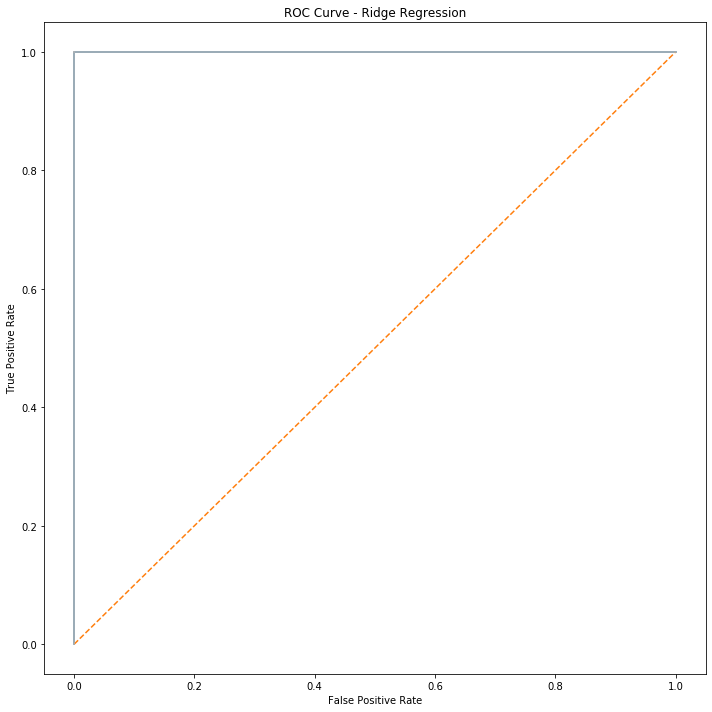

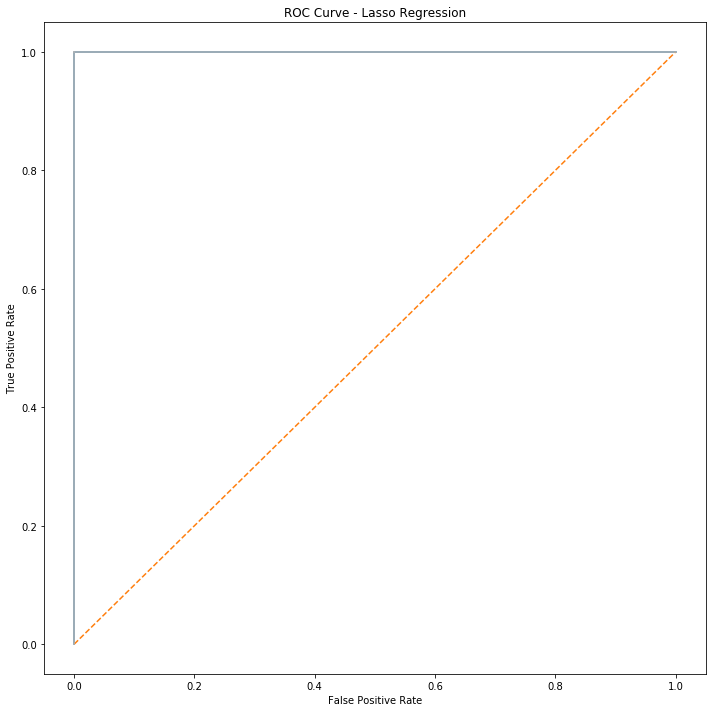

AUROC for Ridge Regession:  1.0
AUROC for Lasso Regession:  1.0


In [19]:
# Determine tpr, fpr and the threshold values for each model
fpr_ridge, tpr_ridge, threshold_ridge = roc_curve(y_test, ridge_pred)
fpr_lasso, tpr_lasso, threshold_lasso = roc_curve(y_test, lasso_pred)

# Ridge Regression Plot
plt.subplots(1, figsize=(10, 10))
plt.title('ROC Curve - Ridge Regression')
plt.plot(fpr_ridge, tpr_ridge)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Lasso Regression Plot
plt.subplots(1, figsize=(10, 10))
plt.title('ROC Curve - Lasso Regression')
plt.plot(fpr_lasso, tpr_lasso)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('AUROC for Ridge Regession: ', roc_auc_score(y_test, ridge_pred))
print('AUROC for Lasso Regession: ', roc_auc_score(y_test, lasso_pred))

**(4)** How do these compare to the models from HW 2? Please describe similarities and differences. 

Compared to HW2, these models do a significantly better job of fitting the testing data. Both models achieve a perfect AUROC score and curve. This is mainly due to the regularization that both models perform. The models from HW2 were too simple in that they had too much variance and not enough bias. The models implemented in this question have much better performance and can generalize better because it balances the Bias-Variance trade-off by introducing a little bit of bias into the model. In return, this increase in bias lowers the amount of variance that the model will have. 

## Problem 5: SVM

Please use the associated Satimage training and testing datasets for this problem.

**(a)** Normalize the data. Please note we have already split the data into training and testing vectors for you.

First, we need to be able to import the data. Since the data has a different format, we need to write our own parser to parse the data.

In [161]:
def parser(filename):
    labels = []
    features = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        for i in range(len(lines)):
            lines[i] = lines[i].strip().split()
            labels.append(int(lines[i][0]))
            features.append([])
            for j in range(36):
                features[i].append(float("nan"))
            for j in range(1, len(lines[i])):
                feature = lines[i][j].split(':')
                index = int(feature[0]) - 1
                value = float(feature[1])
                features[i][index] = value
    data = []
    for i in range(len(labels)):
        d = [labels[i]]
        for j in range(len(features[i])):
            d.append(features[i][j])
        data.append(d)
    return data

Now we import the data and parse it using our parser. 

In [162]:
data_train = parser('satimage.scale.tr')
df_train = pd.DataFrame(data_train)
df_train.dropna(inplace=True)

y_train = df_train[0]
x_train = df_train.drop([0], axis=1)

data_test = parser('satimage.scale.val')
df_test = pd.DataFrame(data_test)
df_test.dropna(inplace=True)

y_test = df_test[0]
x_test = df_test.drop([0], axis=1)

Now we need to normalize our data. 

In [163]:
from sklearn.preprocessing import normalize

x_train = pd.DataFrame(normalize(x_train))
x_test = pd.DataFrame(normalize(x_test))

**(b)** (Hyperparameter tuning) Consider the binary classification that consists of distinguishing class 6 from the rest of the data points. Use SVMs combined with polynomial kernels to solve this classification problem. For each value of the polynomial degree $d=1,2,3,4$, plot the average 10-fold cross-validation error plus or minus one standard deviation as a function of $C$ (let the other parameters of the polynomial kernels be equal to their default values) **ON THE TRAINING DATA**. Report the best value of the trade-off constant $C$ measured on the training internal cross-validation.

We first want to import the proper libraries needed for SVC and parallel computing. We also want to separate label classes from 6 and not 6. 

In [164]:
from joblib import Parallel, delayed
import multiprocessing 
from itertools import product
import os

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, hinge_loss
from sklearn.preprocessing import Imputer

# Augment training labels
y_train_bin = []
for i, row in enumerate(y_train):
    if row == 6:
        y_train_bin.append(1)
    else:
        y_train_bin.append(-1)
y_train = pd.DataFrame(y_train_bin)

# Augment testing labels
y_test_bin = []
for i, row in enumerate(y_test):
    if row == 6:
        y_test_bin.append(1)
    else:
        y_test_bin.append(-1)
y_test = pd.DataFrame(y_test_bin)

(2279, 36)
(2279, 1)


In [166]:
# C values for Cross Validation
c_vals = np.power(float(10), range(-4, 4 + 1))

# Hinge loss values
hinge = {}
for i in range(1,5):
    hinge[i] = {1e-4:[], 1e-3:[], 1e-2:[], 1e-1:[], 1:[], 1e1:[], 1e2:[], 1e3:[], 1e4:[]}

# Perform Stratified K-Fold CV to tune C
for i in range(1,5):
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    for c in c_vals:
        for train_index, test_index in skf.split(x_train, y_train):
            X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
            Y_train, Y_test = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

            svm = SVC(C=c, kernel='poly', tol=1e-7, shrinking=False, degree=i)
            svm.fit(X_train, Y_train)

            pred = svm.predict(X_test)
            hinge[i][c].append(hinge_loss(Y_test, pred))

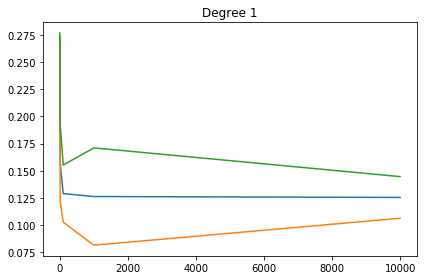

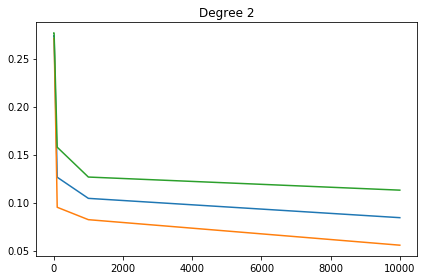

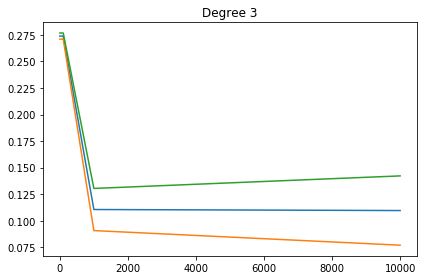

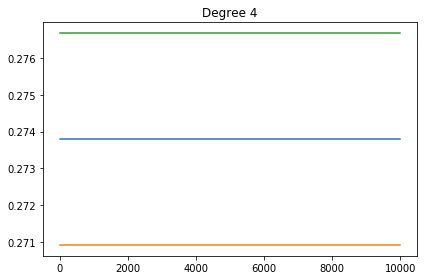

In [179]:
# Generate means and standard deviations to plot
hinge_mean = []
hinge_low = []
hinge_high = []
hinge_std = []
for i in range(4):
    hinge_mean.append([])
    hinge_std.append([])
    hinge_low.append([])
    hinge_high.append([])
    for c in c_vals:
        hinge_m = np.mean(hinge[i + 1][c])
        hinge_s = np.std(hinge[i + 1][c])
        hinge_mean[i].append(hinge_m)
        hinge_std[i].append(hinge_s)
        hinge_low[i].append(hinge_m - hinge_s)
        hinge_high[i].append(hinge_m + hinge_s)
        
# Plot graphs for each degree
for i in range(4):
    title = 'Degree ' + str(i + 1)
    plt.title(title)
    plt.plot(c_vals, hinge_mean[i])
    plt.plot(c_vals, hinge_low[i])
    plt.plot(c_vals, hinge_high[i])
    plt.show()

Note: The blue line represents the mean, the orange line represents minus one standard deviation and the green line represents plus one standard deviation. 

The best C value for each degree is shown below.

In [187]:
min_c_val = []

# Find best C value for each degree
for i in range(4):
    min_c_val.append(c_vals[np.argmin(hinge_mean[i])])
    print('Best C-value for degree', str(i + 1), ':', c_vals[np.argmin(hinge_mean[i])])

Best C-value for degree 1 : 10000.0
Best C-value for degree 2 : 10000.0
Best C-value for degree 3 : 10000.0
Best C-value for degree 4 : 0.0001


Overall, it seems like 10000 was the best value for C overall within each model. 

**(c)** (Model Training and Testing) Let $(C^{*},d^{*})$ be the best pair found previously in the 10-fold internal cross validation. Build a model for each pair on the full training data. Then plot the test errors for each model, as a function of $d$. 

In [203]:
hinge_model = []
support_vectors = []
dual_variables = []

for i in range(4):
    c = min_c_val[i]
    svm = SVC(C=c, kernel='poly', tol=1e-7, shrinking=False, degree=i+1)
    svm.fit(x_train, y_train)
    
    pred = svm.predict(x_test)
    hinge_model.append(hinge_loss(y_test, pred))
    
    support_vectors.append(svm.support_vectors_)
    dual_variables.append(svm.dual_coef_)

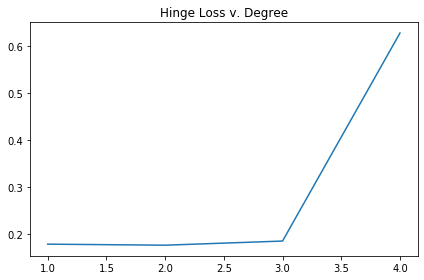

In [190]:
plt.title('Hinge Loss v. Degree')
plt.plot([1,2,3,4], hinge_model)
plt.show()

**(d)** (Results Evaluation) Plot the average number of support vectors obtained as a function of $d$. 

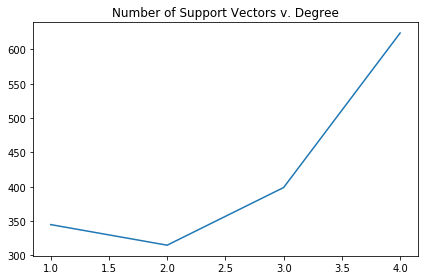

In [198]:
support_vector_lens = []
for i in range(4):
    support_vector_lens.append(len(support_vectors[i]))
plt.title('Number of Support Vectors v. Degree')
plt.plot([1,2,3,4], support_vector_lens)
plt.show()

**(e)** (Results Evaluation) How many of the support vectors lie on the margin hyperplanes?

The number of support vectors that lie on the margin hyperplanes are the points where the dual variables aren't equal to their optimal C value. 

In [209]:
support_vectors_margin = []
for i in range(len(dual_variables)):
    count = 0
    for j in range(len(dual_variables[i].ravel())):
        if dual_variables[i].ravel()[j] != min_c_val[i]:
            count += 1
    support_vectors_margin.append(count)
for i in range(len(support_vectors_margin)):
    print('Number of Support Vectors on margin hyperplane for degree', str(i + 1), ':', support_vectors_margin[i])

Number of Support Vectors on margin hyperplane for degree 1 : 192
Number of Support Vectors on margin hyperplane for degree 2 : 197
Number of Support Vectors on margin hyperplane for degree 3 : 211
Number of Support Vectors on margin hyperplane for degree 4 : 312


**(f)** (Conceptual) Explain how the parameter $d$ influences the model fit (margin size and number of support vectors). 

By having a higher degree $d$ for our polynomial kernel, it allows our decision boundary to be more flexible. This could allow for less support vectors as the decision boundary could take a form that creates more distance between the points near the hyperplane. 

**(g)** (Conceptual) Assume you were using an RBF kernel instead of polynomial kernel, what would the parameter $\gamma$ influence in terms of the model fit (margin size and number of support vectors). 

The $\gamma$ parameter would influence the number of support vectors that the model would create. This is because by increasing $\gamma$, you can tell the model to only look at points very close to the hyperplane.